# Multple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
data = pd.read_csv('colleges.csv', index_col=0)
data = data.drop('Type', axis=1)
data.head()

,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10PercentHS,GraduationPercent
School,,,,,
Amherst,1315,0.22,26636,85,93
Barnard,1220,0.53,17653,69,80
Bates,1240,0.36,17554,58,88
Berkeley,1176,0.37,23665,95,68
Bowdoin,1300,0.24,25703,78,90


In [5]:
independent = data.drop('GraduationPercent', axis=1)

In [6]:
Input = independent.values
Output = data['GraduationPercent'].values



<AxesSubplot:>

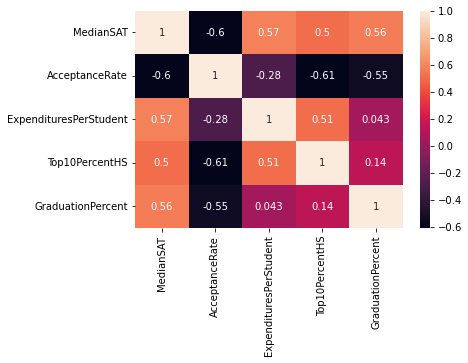

In [9]:
df = data.corr()
sb.heatmap(df, annot=True)

In [13]:
from sklearn import feature_selection

feature_selection.f_regression(Input, Output, center=True)

(array([21.94140465, 20.42366744,  0.08506146,  0.92072345]),
 array([2.42598392e-05, 4.18443571e-05, 7.71835390e-01, 3.42195517e-01]))

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
selector = feature_selection.RFE(model, n_features_to_select=3, step=1)

# Recursive Feature Elimination

selector = selector.fit(Input, Output)
selector.support_

array([ True,  True, False,  True])